# Challenge 2

In this challenge we will continue working with `Pokemon.csv`. We will attempt solving a slightly more complex problem in which we will practice the iterative data analysis process you leaned in [this video](https://www.youtube.com/watch?v=xOomNicqbkk).

The problem statement is as follows:

**You are at a Pokemon black market planning to buy a Pokemon for battle. All Pokemons are sold at the same price and you can only afford to buy one. You cannot choose which specific Pokemon to buy. However, you can specify the type of the Pokemon - one type that exists in either `Type 1` or `Type 2`. Which type should you choose in order to maximize your chance of receiving a good Pokemon?**

To remind you about the 3 steps of iterative data analysis, they are:

1. Setting Expectations
1. Collecting Information
1. Reacting to Data / Revising Expectations

Following the iterative process, we'll guide you in completing the challenge.

## Provlem Solving Iteration 1

In this iteration we'll analyze the problem and identify the breakthrough. The original question statement is kind of vague because we don't know what a *good pokemon* really means as represented in the data. We'll start by understanding the dataset and see if we can find some insights.

In [49]:
# import libraries
import numpy as np
import pandas as pd

In [50]:
# importing the dataset and inspect the first few rows of the data
pokemon = pd.read_csv('Pokemon.csv')
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


From the data it seems whether a pokemon is good depends on its abilities as represented in the fields of `HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, `Speed`, and `Total`. We are not sure about `Generation` and `Legendary` because they are not necessarily the decisive factors of the pokemon abilities.

But `HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, `Speed`, and `Total` are a lot of fields! If we look at them all at once it's very complicated. This isn't Mission Impossible but it's ideal that we tackle this kind of problem after we learn Machine Learning (which you will do in Module 3). For now, is there a way to consolidate the fields we need to look into?

Fortunately there seems to be a way. It appears the `Total` field is computed based on the other 6 fields. But we need to prove our theory. If we can approve there is a formula to compute `Total` based on the other 6 abilities, we only need to look into `Total`.

We have the following expectation now:

#### The `Total` field is computed based on `HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, and `Speed`.

We need to collect the following information:

* **What is the formula to compute `Total`?**
* **Does the formula work for all pokemons?**

In the cell below, make a hypothesis on how `Total` is computed and test your hypothesis.

In [51]:
pokemon['formula']=pokemon['HP']+pokemon['Attack']+pokemon['Defense']+pokemon['Sp. Atk']+pokemon['Sp. Def']+pokemon['Speed']

In [77]:
pokemon['formula'].nlargest(5)

163    780
164    780
426    780
422    770
424    770
Name: formula, dtype: int64

## Provlem Solving Iteration 2

Now that we have consolidated the abilities fields, we can update the problem statement. The new problem statement is:

### Which pokemon type is most likely to have the highest `Total` value?

In the updated problem statement, we assume there is a certain relationship between the `Total` and the pokemon type. But we have two *type* fields (`Type 1` and `Type 2`) that have string values. In data analysis, string fields have to be transformed to numerical format in order to be analyzed. 

In addition, keep in mind that `Type 1` always has a value but `Type 2` is sometimes empty (having the `NaN` value). Also, the pokemon type we choose may be either in `Type 1` or `Type 2`.

Now our expectation is:

#### `Type 1` and `Type 2` string variables need to be converted to numerical variables in order to identify the relationship between `Total` and the pokemon type.

The information we need to collect is:

#### How to convert two string variables to numerical?

Let's address the first question first. You can use a method called **One Hot Encoding** which is frequently used in machine learning to encode categorical string variables to numerical. The idea is to gather all the possible string values in a categorical field and create a numerical field for each unique string value. Each of those numerical fields uses `1` and `0` to indicate whether the data record has the corresponding categorical value. A detailed explanation of One Hot Encoding can be found in [this article](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f). You will formally learn it in Module 3.

For instance, if a pokemon has `Type 1` as `Poison` and `Type 2` as `Fire`, then its `Poison` and `Fire` fields are `1` whereas all other fields are `0`. If a pokemon has `Type 1` as `Water` and `Type 2` as `NaN`, then its `Water` field is `1` whereas all other fields are `0`.

#### In the next cell, use One Hot Encoding to encode `Type 1` and `Type 2`. Use the pokemon type values as the names of the numerical fields you create.

The new numerical variables you create should look like below:

![One Hot Encoding](one-hot-encoding.png)

In [54]:
result=pd.concat([pokemon, pd.get_dummies(pokemon['Type 1'],prefix='T1'), pd.get_dummies(pokemon['Type 2'], prefix='T2')], axis=1)

In [55]:
df_correl=result.corr()

## Provlem Solving Iteration 3

Now we have encoded the pokemon types, we will identify the relationship between `Total` and the encoded fields. Our expectation is:

#### There are relationships between `Total` and the encoded pokemon type variables and we need to identify the correlations.

The information we need to collect is:

#### How to identify the relationship between `Total` and the encoded pokemon type fields?

There are multiple ways to answer this question. The easiest way is to use correlation. In the cell below, calculate the correlation of `Total` to each of the encoded fields. Rank the correlations and identify the #1 pokemon type that is most likely to have the highest `Total`.

In [56]:
df_correl # CHALLENGE N3 started

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,formula,T1_Bug,T1_Dark,T1_Dragon,T1_Electric,T1_Fairy,T1_Fighting,T1_Fire,T1_Flying,T1_Ghost,T1_Grass,T1_Ground,T1_Ice,T1_Normal,T1_Poison,T1_Psychic,T1_Rock,T1_Steel,T1_Water,T2_Bug,T2_Dark,T2_Dragon,T2_Electric,T2_Fairy,T2_Fighting,T2_Fire,T2_Flying,T2_Ghost,T2_Grass,T2_Ground,T2_Ice,T2_Normal,T2_Poison,T2_Psychic,T2_Rock,T2_Steel,T2_Water
#,1.000000,0.119813,0.097614,0.102298,0.094786,0.088759,0.085817,0.010733,0.982516,0.153396,0.119813,-0.041789,0.095022,0.109370,0.000795,0.061367,0.000932,-0.044840,0.107223,0.121257,-0.026684,-0.006404,0.051293,-0.078311,-0.101553,0.023936,0.034660,0.071842,-0.115733,0.005653,0.039250,0.087251,0.042941,0.013411,0.066352,0.070540,-0.056572,0.121081,0.122995,-0.056721,0.050299,0.108329,-0.195128,-0.025565,-0.009633,0.058814,0.023836
Total,0.119813,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.048384,0.501758,1.000000,-0.143957,0.017818,0.196532,0.016715,-0.026948,-0.029086,0.050527,0.029504,0.007594,-0.036057,0.004082,-0.002412,-0.104150,-0.057123,0.094364,0.037524,0.082000,-0.015640,-0.021375,0.065844,0.115240,0.014669,-0.024606,0.138726,0.073234,0.054048,-0.004885,-0.039224,0.016486,0.100870,-0.013956,-0.067837,0.076054,-0.000512,0.070307,-0.018800
HP,0.097614,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620,0.618748,-0.148985,-0.019294,0.112416,-0.089464,0.028056,0.004344,0.006665,0.004143,-0.038565,-0.024116,0.036175,0.018891,0.117377,-0.014991,0.014900,-0.036824,-0.029563,0.044330,-0.038288,0.039477,0.076742,0.064410,-0.033403,0.073278,0.009629,0.031049,-0.052905,-0.046584,0.066803,0.108475,-0.015997,-0.086638,0.024006,-0.006210,-0.030460,-0.034227
Attack,0.102298,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408,0.736211,-0.076059,0.058096,0.208445,-0.073708,-0.079367,0.102423,0.046885,-0.000549,-0.032849,-0.055245,0.105399,-0.033892,-0.063720,-0.025379,-0.064427,0.103101,0.078949,-0.060321,0.020803,0.152040,0.072232,-0.016976,-0.092252,0.191235,0.008555,0.014743,0.021155,-0.026806,0.071586,0.078169,-0.057370,-0.074128,-0.027524,0.020567,0.070451,-0.036447
Defense,0.094786,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377,0.612787,-0.030738,-0.023301,0.082088,-0.058424,-0.038471,-0.047476,-0.051383,-0.017271,0.048110,-0.030232,0.072058,-0.013689,-0.167796,-0.030684,-0.054733,0.208650,0.315013,-0.011601,0.012122,-0.009210,0.064325,-0.015367,0.000149,0.050916,0.025042,-0.065953,0.036158,0.036179,0.113055,0.050535,-0.045704,-0.096563,0.087777,0.227036,0.166162,0.048088
Sp. Atk,0.088759,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907,0.747250,-0.178038,0.011206,0.149956,0.126908,0.025725,-0.112637,0.130299,0.046454,0.040721,0.044316,-0.102064,0.025392,-0.194274,-0.072164,0.216686,-0.069929,-0.030298,0.024583,-0.049067,0.043972,0.119139,0.022187,0.011469,0.047354,0.141875,0.031906,0.001609,-0.069531,-0.047598,0.080900,0.032906,0.007792,0.096477,-0.088467,0.025234,0.006856
Sp. Def,0.085817,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937,0.717609,-0.078493,-0.017228,0.124341,0.015632,0.067833,-0.048376,0.002930,0.001523,0.033514,-0.016411,-0.067175,0.027754,-0.109867,-0.051424,0.143193,0.031009,0.058646,-0.020088,-0.022580,-0.011818,0.062963,0.004993,0.062197,0.069078,0.051460,-0.009300,0.029603,0.016904,-0.039682,0.061823,-0.019505,-0.015080,0.117120,-0.015985,0.086888,-0.015642
Speed,0.010733,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715,0.575943,-0.069781,0.054503,0.103697,0.134757,-0.099895,-0.014179,0.055968,0.083532,-0.027648,-0.067695,-0.030723,-0.029182,0.042114,-0.030860,0.126019,-0.102742,-0.083775,-0.032137,-0.013966,0.038995,0.064140,0.009646,-0.041825,0.120581,0.048394,0.223114,-0.066267,-0.067764,-0.100314,0.029251,0.051191,-0.011828,0.008623,-0.148327,-0.051613,-0.051168
Generation,0.982516,0.048

In [57]:
df_correl.loc['Total'].sort_values(ascending=False)

Total          1.000000
formula        1.000000
Sp. Atk        0.747250
Attack         0.736211
Sp. Def        0.717609
HP             0.618748
Defense        0.612787
Speed          0.575943
Legendary      0.501758
T1_Dragon      0.196532
T2_Fighting    0.138726
#              0.119813
T2_Dragon      0.115240
T2_Ice         0.100870
T1_Psychic     0.094364
T1_Steel       0.082000
T2_Psychic     0.076054
T2_Fire        0.073234
T2_Steel       0.070307
T2_Dark        0.065844
T2_Flying      0.054048
T1_Fire        0.050527
Generation     0.048384
T1_Rock        0.037524
T1_Flying      0.029504
T1_Dark        0.017818
T1_Electric    0.016715
T2_Ground      0.016486
T2_Electric    0.014669
T1_Ghost       0.007594
T1_Ground      0.004082
T2_Rock       -0.000512
T1_Ice        -0.002412
T2_Ghost      -0.004885
T2_Normal     -0.013956
T1_Water      -0.015640
T2_Water      -0.018800
T2_Bug        -0.021375
T2_Fairy      -0.024606
T1_Fairy      -0.026948
T1_Fighting   -0.029086
T1_Grass      -0

In [58]:
#pd.set_option('display.max_columns', 500)  
# to display all columns

In [59]:
# the most strong pokemons are of type Type 1 Dragon   :   0.196532
# T2_Fighting    0.138726

In [70]:
df_correl.loc['Attack'].sort_values(ascending=False)

Attack         1.000000
Total          0.736211
formula        0.736211
Defense        0.438687
HP             0.422386
Sp. Atk        0.396362
Speed          0.381240
Legendary      0.345408
Sp. Def        0.263990
T1_Dragon      0.208445
T2_Fighting    0.191235
T2_Dark        0.152040
T1_Ground      0.105399
T1_Rock        0.103101
T1_Fighting    0.102423
#              0.102298
T1_Steel       0.078949
T2_Ice         0.078169
T2_Dragon      0.072232
T2_Ground      0.071586
T2_Steel       0.070451
T1_Dark        0.058096
Generation     0.051451
T1_Fire        0.046885
T2_Ghost       0.021155
T2_Bug         0.020803
T2_Rock        0.020567
T2_Flying      0.014743
T2_Fire        0.008555
T1_Flying     -0.000549
T2_Electric   -0.016976
T1_Poison     -0.025379
T2_Grass      -0.026806
T2_Psychic    -0.027524
T1_Ghost      -0.032849
T1_Ice        -0.033892
T2_Water      -0.036447
T1_Grass      -0.055245
T2_Normal     -0.057370
T1_Water      -0.060321
T1_Normal     -0.063720
T1_Psychic    -0

# Bonus Question

Say now you can choose both `Type 1` and `Type 2` of the pokemon. In order to receive the best pokemon, which types will you choose?

In [88]:
pokemon.loc[((pokemon['Type 1']=='Dragon') | (pokemon['Type 2'] == 'Fighting')) & (pokemon['Total']>770)]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,formula
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,780
426,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True,780


In [94]:
pokemon.loc[((pokemon['Type 1']=='Dragon') | (pokemon['Type 2'] == 'Fighting')) & (pokemon['Total']>770) & (pokemon['Attack']>180)]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,formula
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,780


 Pokemon Mewtwo X, Type 1 =Psychic ; Type 2= Fighting seem to be the most strong

Populating the interactive namespace from numpy and matplotlib


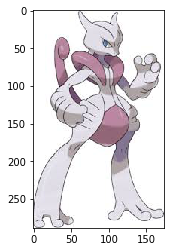

In [97]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('MewtwoX.jpg')
imgplot = plt.imshow(img)
plt.show()

In [100]:
from IPython.display import Image
Image(url='https://www.pokepedia.fr/images/thumb/5/5a/M%C3%A9ga-Mewtwo_X-XY.png/361px-M%C3%A9ga-Mewtwo_X-XY.png')